- จน userid df_y น้อยกว่า df อื่น

In [324]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

random_state = 0

In [146]:
df_y = pd.read_csv('y_train.csv')
df_demo = pd.read_csv('demo.csv')
df_cardinfo = pd.read_csv('card_info.csv')
df_cctxn = pd.read_csv('cc_txn.csv')
df_sabal = pd.read_csv('sa_bal.csv')
df_dtxn = pd.read_csv('dtxn.csv')

all_df = {'df_y - Output for selected user ids':df_y,
        'df_demo - Personal information of customers':df_demo,
        'df_cardinfo - Credit card information':df_cardinfo,
        'df_cctxn - Credit card transaction log':df_cctxn,
        'df_sabal - Saving account balance aggregated by months':df_sabal,
        'df_dtxn - Incoming and outgoing transactions aggregated by months (exclude credit card transactions)':df_dtxn}

# all_df = [df_y, df_demo, df_cardinfo, df_cctxn, df_sabal, df_dtxn]

In [147]:
# head
for df in all_df:
    print(f"Head of DataFrame: {df} - {all_df[df].shape}:")
    display(all_df[df].head(3))
    print('\n' + '='*50 + '\n')

Head of DataFrame: df_y - Output for selected user ids - (494, 2):


,user_id,label
0,2723,1.0
1,44088,1.0
2,3139,0.0




Head of DataFrame: df_demo - Personal information of customers - (52762, 7):


,user_id,account_start_date,birth_year,gender,marital_status,family_income_segment_code,individual_income_segment_code
0,27616,1975-04-15,1961.0,F,,06,04
1,14619,1971-01-31,1943.0,F,1,04,09
2,13595,1960-11-24,1952.0,F,1,07,07




Head of DataFrame: df_cardinfo - Credit card information - (60296, 4):


,user_id,bill_cyc,cr_lmt_amt,card_no
0,0,17.0,244000,0
1,1,12.0,361000,1
2,2,12.0,385000,2




Head of DataFrame: df_cctxn - Credit card transaction log - (3223075, 5):


,mcc,txn_dt,user_id,txn_amt,card_no
0,mcc_cat10,2017-04-12,17863,16391.0,21616.0
1,mcc_cat11,2017-07-12,7682,117200.0,9438.0
2,mcc_cat12,2017-05-23,33603,55602.0,39476.0




Head of DataFrame: df_sabal - Saving account balance aggregated by months - (633144, 3):


,user_id,mm,max_sa_bal
0,0,1,535052.0
1,0,10,0.0
2,0,11,161530.0




Head of DataFrame: df_dtxn - Incoming and outgoing transactions aggregated by months (exclude credit card transactions) - (490599, 4):


,user_id,mm,amt_in,amt_out
0,0,1,17725.0,4490.0
1,0,2,12431.0,29286.0
2,0,3,86274.0,0.0


In [148]:
# null checking
for df in all_df:
    print(f"Null check of DataFrame: {df} - {all_df[df].shape}:")

    # Clean undetectable null values
    for col in all_df[df].columns:
        if all_df[df][col].dtype == 'O':  # 'O' represents object (string) type
            all_df[df][col] = all_df[df][col].str.strip()

    all_df[df].replace('', np.nan, inplace=True)

    print(all_df[df].isnull().sum())

    print('\n' + '='*50 + '\n')

Null check of DataFrame: df_y - Output for selected user ids - (494, 2):
user_id    0
label      0
dtype: int64


Null check of DataFrame: df_demo - Personal information of customers - (52762, 7):
user_id                               0
account_start_date                    0
birth_year                            0
gender                                0
marital_status                    12295
family_income_segment_code         6822
individual_income_segment_code     3199
dtype: int64


Null check of DataFrame: df_cardinfo - Credit card information - (60296, 4):
user_id       0
bill_cyc      0
cr_lmt_amt    0
card_no       0
dtype: int64


Null check of DataFrame: df_cctxn - Credit card transaction log - (3223075, 5):
mcc        0
txn_dt     0
user_id    0
txn_amt    0
card_no    0
dtype: int64


Null check of DataFrame: df_sabal - Saving account balance aggregated by months - (633144, 3):
user_id       0
mm            0
max_sa_bal    0
dtype: int64


Null check of DataFrame: df_dtxn -

In [352]:
# duplicate checking
for df in all_df:
    print(f"Head of DataFrame: {df} - {all_df[df].shape}:")
    display(all_df[df][all_df[df].duplicated()])
    print('\n' + '='*50 + '\n')

Head of DataFrame: df_y - Output for selected user ids - (494, 2):


,user_id,label




Head of DataFrame: df_demo - Personal information of customers - (52762, 9):


,user_id,account_start_date,birth_year,gender,marital_status,family_income_segment_code,individual_income_segment_code,cus_dur,age




Head of DataFrame: df_cardinfo - Credit card information - (60296, 4):


,user_id,bill_cyc,cr_lmt_amt,card_no




Head of DataFrame: df_cctxn - Credit card transaction log - (3223075, 7):


,mcc,txn_dt,user_id,txn_amt,card_no,txn_month,txn_day




Head of DataFrame: df_sabal - Saving account balance aggregated by months - (633144, 3):


,user_id,mm,max_sa_bal




Head of DataFrame: df_dtxn - Incoming and outgoing transactions aggregated by months (exclude credit card transactions) - (490599, 4):


,user_id,mm,amt_in,amt_out


In [150]:
df_y.sort_values('user_id', ascending=True)

,user_id,label
452,10,0.0
169,47,0.0
479,262,0.0
284,366,0.0
124,612,0.0
...,...,...
191,52039,0.0
262,52069,0.0
263,52607,0.0
424,52619,0.0


# EDA

In [152]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52762 entries, 0 to 52761
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         52762 non-null  int64  
 1   account_start_date              52762 non-null  object 
 2   birth_year                      52762 non-null  float64
 3   gender                          52762 non-null  object 
 4   marital_status                  40467 non-null  object 
 5   family_income_segment_code      45940 non-null  object 
 6   individual_income_segment_code  49563 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.8+ MB


In [153]:
df_demo['account_start_date'] = pd.to_datetime(df_demo['account_start_date'])
df_demo['cus_dur'] = 2017 - df_demo['account_start_date'].dt.year # customers durations
df_demo['age'] = 2017 - df_demo['birth_year'] # age of customers

In [154]:
df_demo.describe().T

,count,mean,min,25%,50%,75%,max,std
user_id,52762.0,26380.5,0.0,13190.25,26380.5,39570.75,52761.0,15231.221788
account_start_date,52762,1972-03-29 02:10:35.639285856,1940-01-01 00:00:00,1968-01-21 00:00:00,1972-03-18 00:00:00,1976-05-12 00:00:00,2008-06-12 00:00:00,NaN
birth_year,52762.0,1947.72683,1900.0,1942.0,1948.0,1954.0,2000.0,9.799852
cus_dur,52762.0,45.259619,9.0,41.0,45.0,49.0,77.0,6.649371
age,52762.0,69.27317,17.0,63.0,69.0,75.0,117.0,9.799852


In [155]:
# df_demo.dropna(inplace=True)

c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


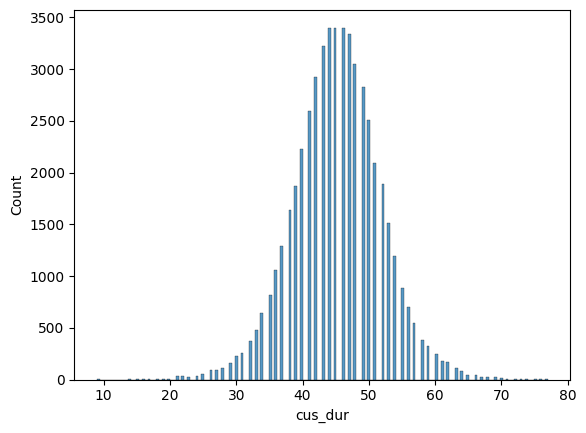

In [156]:
sns.histplot(x='cus_dur', data=df_demo)
plt.show()

c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


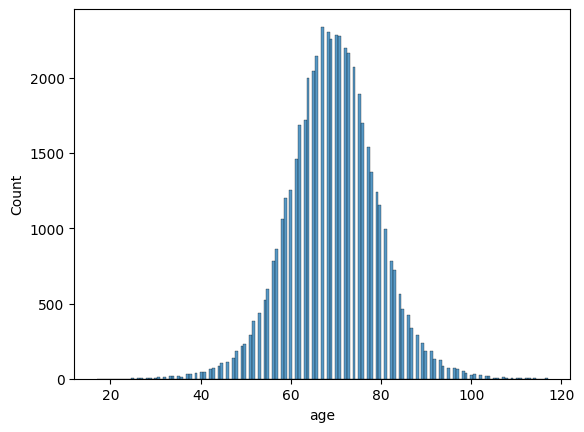

In [157]:
sns.histplot(x='age', data=df_demo)
plt.show()

In [158]:
# sns.countplot(x='family_income_segment_code', data=df_demo, order=df_demo['family_income_segment_code'].value_counts().index)
sns.countplot(x='family_income_segment_code', data=df_demo, order=sorted(df_demo['family_income_segment_code'].unique()))
plt.show()

TypeError: '<' not supported between instances of 'float' and 'str'

In [159]:
sns.countplot(x='individual_income_segment_code', data=df_demo, order=sorted(df_demo['individual_income_segment_code'].unique()))
plt.show()

TypeError: '<' not supported between instances of 'float' and 'str'

In [160]:
sns.countplot(x='marital_status', data=df_demo, order=sorted(df_demo['marital_status'].unique()))
plt.show()

TypeError: '<' not supported between instances of 'str' and 'float'

In [161]:
famind_score = df_demo['family_income_segment_code'] + '-' + df_demo['individual_income_segment_code']
famind_score.value_counts()

05-04    490
04-04    485
06-04    475
02-07    466
01-04    465
        ... 
02-11    362
03-02    358
06-06    357
02-12    353
06-13    349
Name: count, Length: 105, dtype: int64

In [162]:
# df_demo['family_income_segment_code'] = df_demo['family_income_segment_code'].astype(int)
# df_demo['individual_income_segment_code'] = df_demo['individual_income_segment_code'].astype(int)

In [163]:
df_cardinfo.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,60296.0,25662.876028,15238.525017,0.0,12346.00,25395.5,38737.25,52761.0
bill_cyc,60296.0,15.059672,2.754340,0.0,13.00,15.0,17.00,30.0
cr_lmt_amt,60296.0,525042.987926,382398.349754,1000.0,240000.00,451000.0,723000.00,3662000.0
card_no,60296.0,30147.500000,17406.100252,0.0,15073.75,30147.5,45221.25,60295.0


In [164]:
df_cardinfo

,user_id,bill_cyc,cr_lmt_amt,card_no
0,0,17.0,244000,0
1,1,12.0,361000,1
2,2,12.0,385000,2
3,3,15.0,518000,3
4,4,15.0,889000,4
...,...,...,...,...
60291,52757,14.0,2146000,60291
60292,52758,12.0,1273000,60292
60293,52759,16.0,1250000,60293
60294,52760,11.0,1078000,60294


In [165]:
# test = pd.merge(df_cardinfo[['user_id', 'cr_lmt_amt']], df_demo[['user_id', 'individual_income_segment_code']], on='user_id')
# sns.scatterplot(x='individual_income_segment_code', y='cr_lmt_amt', data=test)

In [218]:
df_cctxn['txn_dt'] = pd.to_datetime(df_cctxn['txn_dt'])
df_cctxn['txn_month'] = df_cctxn['txn_dt'].dt.month

c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\terjr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sum', ylabel='mcc'>

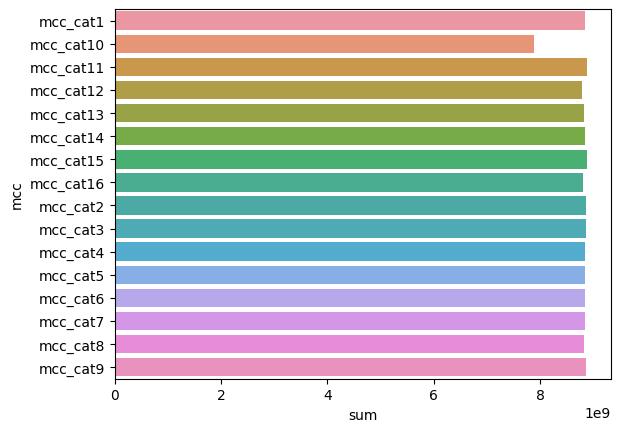

In [270]:
test = df_cctxn.groupby('mcc').agg(sum=('txn_amt', 'sum')).reset_index()
sns.barplot(x='sum', y='mcc', data=test)

In [293]:
df_cctxn

,mcc,txn_dt,user_id,txn_amt,card_no,txn_month,txn_day
0,mcc_cat10,2017-04-12,17863,16391.0,21616.0,4,12
1,mcc_cat11,2017-07-12,7682,117200.0,9438.0,7,12
2,mcc_cat12,2017-05-23,33603,55602.0,39476.0,5,23
3,mcc_cat4,2017-11-03,44040,38894.0,50979.0,11,3
4,mcc_cat14,2017-12-18,4529,29524.0,5582.0,12,18
...,...,...,...,...,...,...,...
3223070,mcc_cat9,2017-03-01,49742,8164.0,57110.0,3,1
3223071,mcc_cat8,2017-11-19,21085,31146.0,25328.0,11,19
3223072,mcc_cat3,2017-03-22,35306,31265.0,41396.0,3,22
3223073,mcc_cat11,2017-04-01,37777,11044.0,44154.0,4,1


# Feature Engineering

In [206]:
# # Find the most bought category for each customer
# cust_dict = {'user_id':[],
#             'most_buying_cat':[]}

# cust_cat = df_cctxn.groupby(['user_id','mcc'])['mcc'].agg(qty='count').reset_index()

# for i in cust_cat['user_id'].unique():
#     cust_dict['user_id'].append(i)
#     cust = cust_cat.loc[cust_cat['user_id']==i,:]

#     if len(cust.loc[cust['qty']==cust['qty'].max()]['mcc']) == 1:
#         cust_dict['most_buying_cat'].append(cust.loc[cust['qty']==cust['qty'].max()]['mcc'].reset_index(drop=True)[0])
#     elif len(cust.loc[cust['qty']==cust['qty'].max()]['mcc']) > 1:
#         # if most buying cat more than one convert to list
#         cust_dict['most_buying_cat'].append(list(cust.loc[cust['qty']==cust['qty'].max()]['mcc']))

In [341]:
# create feature df
df_feature = df_demo[['user_id']].drop_duplicates().sort_values(by='user_id').reset_index(drop=True)

# aggreate data and merge witn feature data frame
df_feature = df_feature.merge(
    df_cctxn.groupby('user_id').agg(
        card_count = ('card_no', 'nunique'), # number of cards
        total_spend = ('txn_amt', 'sum'), # total spending
        total_trans = ('txn_amt', 'count'), # count of transaction
        last_txn = ('txn_dt', 'max'), # last transaction
        count_day = ('txn_dt', 'nunique'), # count of day transaction happened
        count_month = ('txn_month', 'nunique')), # count of month transaction happened
        on='user_id')

# aggregate for 3 months period
df_feature = df_feature.merge(
    df_cctxn.loc[df_cctxn['txn_month'] > (df_cctxn['txn_month'].max() - 3), :].groupby('user_id').agg(
        total_trans_3m = ('txn_amt', 'count'), # total spending
        total_spend_3m = ('txn_amt', 'sum'), # count of transaction
        count_day_3m = ('txn_dt', 'nunique'), # count of day transaction happened
        count_month_3m = ('txn_month', 'nunique')), # count of month transaction happened
    on='user_id')

# aggregate for 6 months period
df_feature = df_feature.merge(
    df_cctxn.loc[df_cctxn['txn_month'] > (df_cctxn['txn_month'].max() - 6), :].groupby('user_id').agg(
        total_trans_6m = ('txn_amt', 'count'), # total spending
        total_spend_6m = ('txn_amt', 'sum'), # count of transaction
        count_day_6m = ('txn_dt', 'nunique'), # count of day transaction happened
        count_month_6m = ('txn_month', 'nunique')), # count of month transaction happened
    on='user_id')

# recency = duration between last transaction of customer and 2017-12-31
df_feature['recency'] = (df_cctxn['txn_dt'].max() - df_feature['last_txn']).dt.days

# # join with most buying cat df
# df_feature = df_feature.merge(pd.DataFrame(cust_dict), how='inner', on='user_id')

df_feature.drop(columns=['last_txn'], inplace=True)

df_feature.head()

,user_id,card_count,total_spend,total_trans,count_day,count_month,total_trans_3m,total_spend_3m,count_day_3m,count_month_3m,total_trans_6m,total_spend_6m,count_day_6m,count_month_6m,recency
0,0,1,1746107.0,56,53,12,15,504694.0,13,3,27,852850.0,25,6,3
1,1,1,2234391.0,64,56,12,25,784067.0,22,3,37,1220829.0,32,6,0
2,2,1,1632778.0,43,38,11,12,442390.0,12,3,23,815837.0,21,5,10
3,3,1,2884456.0,45,42,10,17,974785.0,15,3,32,1914940.0,30,6,6
4,4,1,2973483.0,43,39,10,11,773503.0,10,2,21,1327124.0,19,5,0


In [344]:
df_feature.loc[df_feature['total_trans']<30]

,user_id,card_count,total_spend,total_trans,count_day,count_month,total_trans_3m,total_spend_3m,count_day_3m,count_month_3m,total_trans_6m,total_spend_6m,count_day_6m,count_month_6m,recency
12009,12009,1,881232.0,27,26,10,6,206528.0,6,3,13,461411.0,12,6,15
35074,35075,1,1006824.0,29,28,11,9,207085.0,9,3,15,334236.0,14,6,3
49750,49751,1,844913.0,26,25,10,4,161784.0,4,3,10,299086.0,10,6,1


In [348]:
df_feature_train = df_feature.copy().merge(df_y, on='user_id')
# df_feature_train.drop(columns=['most_buying_cat'], inplace=True)
df_feature_train

,user_id,card_count,total_spend,total_trans,count_day,count_month,total_trans_3m,total_spend_3m,count_day_3m,count_month_3m,total_trans_6m,total_spend_6m,count_day_6m,count_month_6m,recency,label
0,10,1,2267081.0,51,48,11,14,594988.0,14,3,28,1201221.0,27,6,0,0.0
1,47,1,1727249.0,53,49,11,11,285450.0,11,3,29,981797.0,26,6,0,0.0
2,262,1,1861840.0,44,38,12,10,451322.0,10,3,24,940753.0,21,6,0,0.0
3,366,2,3741925.0,105,94,12,25,966898.0,23,3,57,2135298.0,51,6,10,0.0
4,612,2,4287773.0,107,94,12,31,1514201.0,27,3,61,2512421.0,53,6,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,52039,1,2057662.0,68,56,12,14,303992.0,12,3,33,1121186.0,25,6,4,0.0
490,52069,1,2717461.0,55,51,12,17,921044.0,15,3,33,1908248.0,30,6,0,0.0
491,52607,1,2741077.0,58,51,12,17,886527.0,15,3,34,1803355.0,30,6,0,0.0
492,52619,1,3080829.0,66,61,11,17,818428.0,15,3,42,1862461.0,38,6,16,0.0


# Model

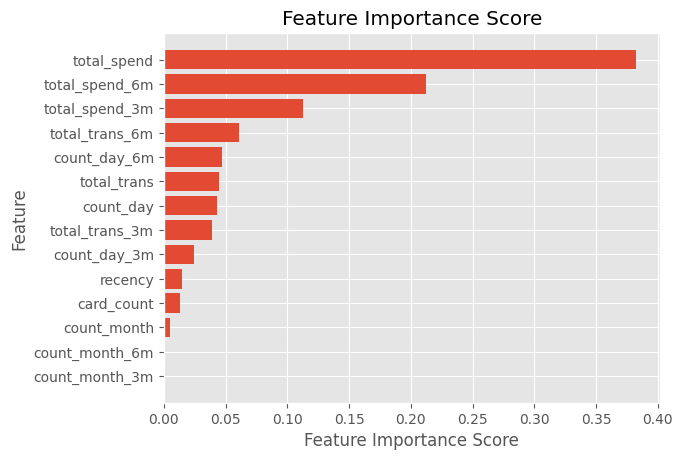

In [349]:
# X = df_feature_train.drop(columns=['user_id', 'label'])
X = df_feature_train.drop(columns=['user_id', 'label'])
y = df_feature_train['label']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=random_state)

# Train the classifier on your data
clf.fit(X, y)

# Get the feature importance scores
importance_scores = clf.feature_importances_

# Sort the features based on importance in descending order
sorted_indices = np.argsort(importance_scores)[::-1]

# # Print the feature rankings
# for i, idx in enumerate(sorted_indices):
#     print(f"Rank {i}: Feature {df_clus.columns[idx]}, Importance score: {importance_scores[idx]}")

# Plotting the feature importance
plt.barh(range(len(sorted_indices)), importance_scores[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [df_feature_train.columns[idx+1] for idx in sorted_indices])
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

model = RandomForestClassifier(random_state=random_state)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       108
         1.0       0.98      1.00      0.99        41

    accuracy                           0.99       149
   macro avg       0.99      1.00      0.99       149
weighted avg       0.99      0.99      0.99       149



In [351]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f2 = 5*precision*recall/((4*precision)+recall)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F2: {f2:.4f}')

Precision: 0.9762
Recall: 1.0000
F2: 0.9951
